# HW3  Logistisc Regression 

## Due on 11/11/2019: 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## In this HW, we will be building a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html


The goal of the HW is to see if one can predict
whether a woman on given certain attributeds, suchas age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [2]:
# The dataset can be imported via the statsmodels like the following, but we are going to read from a csv file
# provided by the professor
# import statsmodels.api as sm
# orig_df = sm.datasets.fair.load_pandas().data

df = pd.read_csv("affairs2.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [3]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [5]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


### Let's do some exploratory data analysis. First check and remove missing values

### Question 1: Use a seaborn heatmap similar to what has shown in class to show if there are any missing values. Simply drop the rows that have missing values

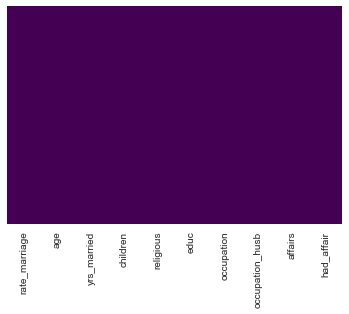

In [121]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [122]:
#drop age rows with missing values
df.dropna(inplace=True)

After dropping the NA, run the df.isnull().sum(), it should show 0 for every features

In [123]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
had_affair         0
dtype: int64

### Now, let's group by has or no affairs rows

In [124]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb,affairs
had_affair,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.884559,2.187243


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

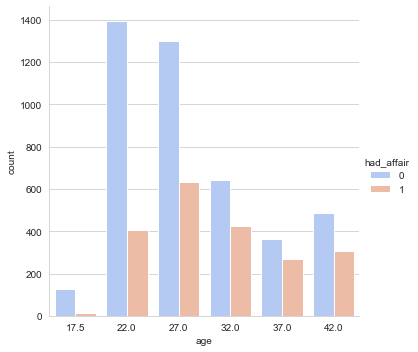

In [125]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm');

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

Now, we can do the same thing for years of marriage

### Question 2:  Use a factorplot to investigate if number of years of marriage is an important factor or not. Explain whether the chance of having an affair will increase or not when years of marriage increase

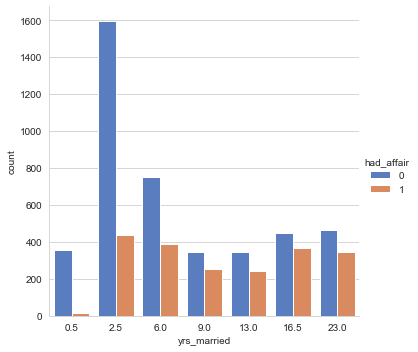

In [126]:
sns.factorplot('yrs_married', kind='count', hue='had_affair', data=df,palette='muted')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that after 2.5 years of marriage the affairs increased significantly. Therefore, the longer you're married there's a higher probability of an affair occurring. 

### Question 3: Now check also if number of children and education level are important factors or not. Explain what you had observed just from using the factorplot

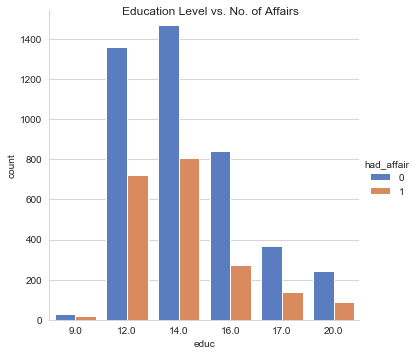

In [127]:
# Education Level
educ_level = sns.factorplot('educ',kind='count', hue='had_affair', data=df,palette='muted')
educ_level.fig.suptitle('Education Level vs. No. of Affairs')
educ_level;

Based on the Education Level, there are a lower amount of affairs for higher education graduates (undergrad, grad, and advanced degree). The highest number of affairs occured with couples who only had a high school degree, or some college education. However, those who only had a grade school education also have the lowest level of affairs. (Like an outlier)

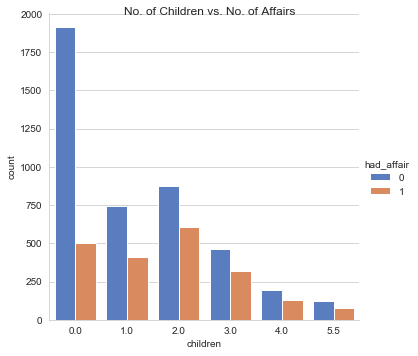

In [128]:
# Number of Children
no_children = sns.factorplot('children', kind='count', hue='had_affair', data=df,palette='muted')
no_children.fig.suptitle('No. of Children vs. No. of Affairs')
no_children;

Based on the graph, people with two or less kids have a higher proability of having an affair in there marriage, than individuals with 3 or more kids.

### Question 4: build a logistic regression model with only Age, Number of years married, number of children, education, religious to forecast had_affair. Remember to do the Train Test Split first

In [129]:
# TODO:
# create a df2 from df with all the age, years of married, ... columns
# call train_test_split, remember to drop the had_affair columns in your X variables, Y should be had_affair
# create a LogisticRegression object and call its fit method
# call the classification report and print accuracy score

In [158]:
df2 = df[['had_affair','age','yrs_married','children','educ','religious']]
df2.head()

,had_affair,age,yrs_married,children,educ,religious
0,1,32.0,9.0,3.0,17.0,3.0
1,1,27.0,13.0,3.0,14.0,1.0
2,1,22.0,2.5,0.0,16.0,1.0
3,1,37.0,16.5,4.0,16.0,3.0
4,1,27.0,9.0,1.0,14.0,1.0


In [193]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('had_affair',axis=1), 
                                                    df2['had_affair'], test_size=0.30, 
                                                    random_state=101)

In [194]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),2))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80      1277
           1       0.58      0.16      0.25       633

    accuracy                           0.68      1910
   macro avg       0.64      0.55      0.52      1910
weighted avg       0.66      0.68      0.62      1910

Accuracy Score: 0.68 


## This is approx. 70% which is pretty good

### Question 5: Now, call a countplot to show the dependence of the affair on occupation, then include the occupation categorical variable to build a better model

In [161]:
# call sns.countplot for occupation using the original df dataframe

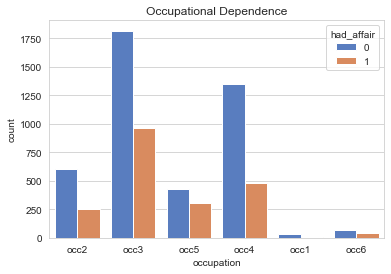

In [162]:
sns.set_style('whitegrid')
h = sns.countplot(x='occupation',hue='had_affair',data=df,palette='muted').set_title('Occupational Dependence')

In [163]:
# call the get_dummies method for the occupation variable

In [206]:
occup = pd.get_dummies(df['occupation'],drop_first=True)

In [207]:
occup.head()

,occ2,occ3,occ4,occ5,occ6
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [208]:
# create a df3 which is combining df2 with this new set of dummy variables using pd.concat method
# df2.drop('had_affair',axis=1,inplace=True)
df3 = pd.concat([df2,occup],axis=1)
df3.head()

,had_affair,age,yrs_married,children,educ,religious,occ2,occ3,occ4,occ5,occ6
0,1,32.0,9.0,3.0,17.0,3.0,1,0,0,0,0
1,1,27.0,13.0,3.0,14.0,1.0,0,1,0,0,0
2,1,22.0,2.5,0.0,16.0,1.0,0,1,0,0,0
3,1,37.0,16.5,4.0,16.0,3.0,0,0,0,1,0
4,1,27.0,9.0,1.0,14.0,1.0,0,1,0,0,0


In [209]:
# now you have a df3 with 10 features 
# call train test split and do the usual model fitting and model performance things
X_train, X_test, Y_train, Y_test = train_test_split(df3.drop('had_affair',axis=1), 
                                                    df3['had_affair'], test_size=0.20, 
                                                    random_state=101)

model = LogisticRegression()
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),2))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       850
           1       0.61      0.19      0.29       424

    accuracy                           0.69      1274
   macro avg       0.66      0.57      0.55      1274
weighted avg       0.67      0.69      0.63      1274

Accuracy Score: 0.69 


## Question 6: Can you comment on your results based on the performance metrics (Precision, Recall and Accuracy Score)?

The accuracy score only increased by .01. However, the precision values went up 